# <center> TIPS ANALYSIS </center>

In [59]:
import pandas as pd
import openpyxl
import plotly.express as px
from scipy import stats
import plotly.graph_objects as go


In [79]:
file_path = 'tips.xlsx'
sheet_name = 'Data'

# Read the specific sheet
df = pd.read_excel(file_path, sheet_name=sheet_name)
df = df.drop(columns=['Unnamed: 0'])
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [71]:
df['day'].unique()

['Thur', 'Fri', 'Sat', 'Sun']
Categories (7, object): ['Mon' < 'Tue' < 'Wed' < 'Thur' < 'Fri' < 'Sat' < 'Sun']

In [42]:
df['smoker'].unique()

array(['No', 'Yes'], dtype=object)

# Análisis Eploratorio de Datos

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [56]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# ¿Cuál es el día preferido para comer?



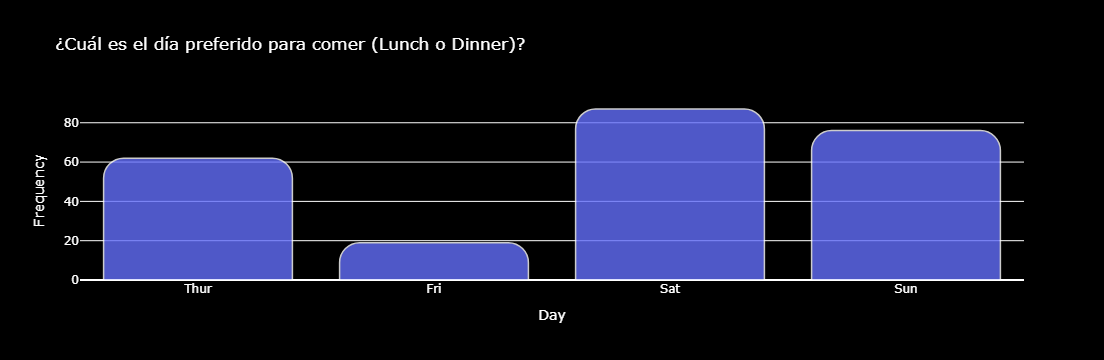

In [80]:


# Aggregate data by day
day_counts = df['day'].value_counts().reset_index()
day_counts.columns = ['day', 'count']

# Sort by day to have a consistent order
day_order = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
day_counts['day'] = pd.Categorical(day_counts['day'], categories=day_order, ordered=True)
day_counts = day_counts.sort_values('day')

# Create a bar chart using Plotly
fig = px.bar(day_counts, x='day', y='count', title='¿Cuál es el día preferido para comer (Lunch o Dinner)?', labels={'count': 'Frequency', 'day': 'Day'})

# Update layout for a black background
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font_color='white',
    legend_title_font_color='white',
)

# Customize bars with rounded corners
fig.update_traces(marker=dict(line=dict(color='white', width=1.5), opacity=0.8))

# Add rounded corners to bars using cornerradius
for trace in fig.data:
    trace.marker.update(cornerradius=20)

# Show the plot
fig.show()

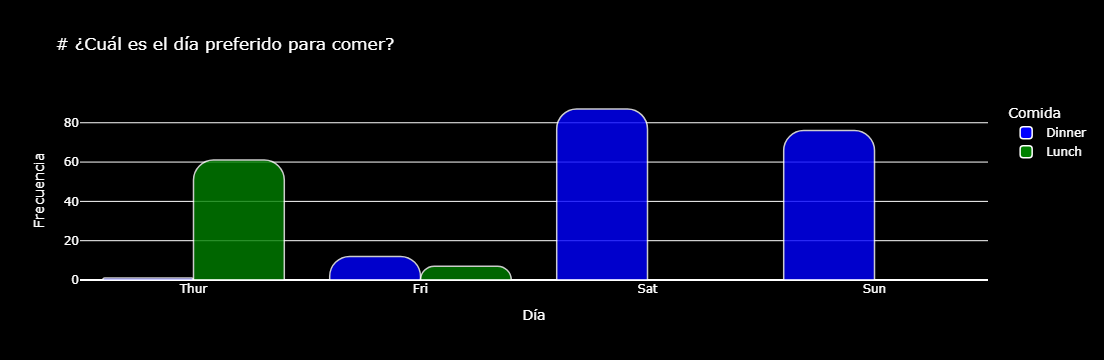

In [83]:

# Aggregate data by day and time
day_counts = df.groupby(['day', 'time']).size().reset_index(name='count')

# Sort by day to have a consistent order
day_order = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
day_counts['day'] = pd.Categorical(day_counts['day'], categories=day_order, ordered=True)
day_counts = day_counts.sort_values(['day', 'time'])

# Create a bar chart using Plotly
fig = px.bar(day_counts, x='day', y='count', color='time',
             title='# ¿Cuál es el día preferido para comer?',
             labels={'count': 'Frecuencia', 'day': 'Día', 'time': 'Comida'},
             color_discrete_map={'Dinner': 'blue', 'Lunch': 'green'},
             barmode='group')  # Use 'group' to group bars

# Update layout for a black background
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font_color='white',
    legend_title_font_color='white',
)

# Customize bars with rounded corners
fig.update_traces(marker=dict(line=dict(color='white', width=1.5), opacity=0.8))

# Add rounded corners to bars using cornerradius
for trace in fig.data:
    trace.marker.update(cornerradius=20)

# Show the plot
fig.show()


# ¿Qué días de la semana hay más pagadores hombres que mujeres?


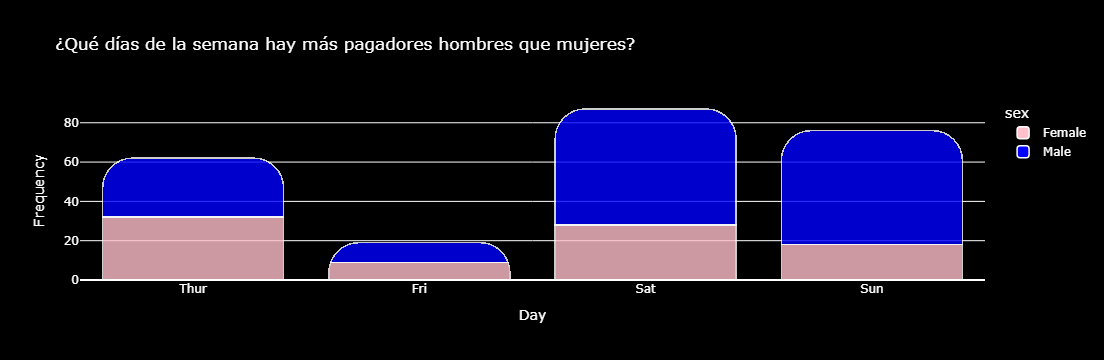

In [57]:

# Aggregate data by day and sex
day_sex_counts = df.groupby(['day', 'sex']).size().reset_index(name='count')

# Sort by day to have a consistent order
day_order = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
day_sex_counts['day'] = pd.Categorical(day_sex_counts['day'], categories=day_order, ordered=True)
day_sex_counts = day_sex_counts.sort_values('day')

# Create a stacked bar chart using Plotly
fig = px.bar(
    day_sex_counts, 
    x='day', 
    y='count', 
    color='sex', 
    title='¿Qué días de la semana hay más pagadores hombres que mujeres?', 
    labels={'count': 'Frequency', 'day': 'Day'},
    barmode='stack',
    color_discrete_map={'Male': 'blue', 'Female': 'pink'}
)

# Update layout for a black background
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font_color='white',
    legend_title_font_color='white',
)

# Customize bars with rounded corners and adjust opacity
fig.update_traces(marker=dict(line=dict(color='white', width=1.5), opacity=0.8, cornerradius=30))

# Show the plot
fig.show()

# ¿Cree que los importes de las facturas cambian considerablemente según se fume?


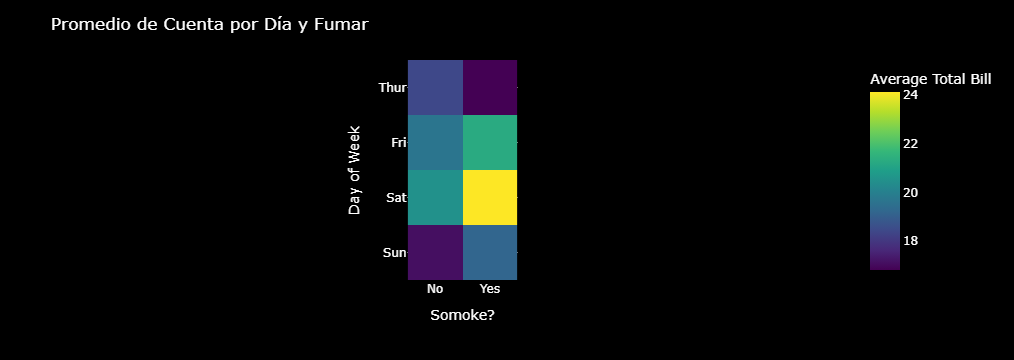

In [43]:
# Group by day and time, calculate average total_bill
heatmap_data = df.groupby(['day', 'smoker'])['total_bill'].mean().reset_index()

# Pivot the data to prepare for heatmap
heatmap_data_pivot = heatmap_data.pivot(index='day', columns='smoker', values='total_bill')

# Create a heatmap using Plotly
fig = px.imshow(
    heatmap_data_pivot,
    labels=dict(x="Somoke?", y="Day of Week", color="Average Total Bill"),
    x=['No', 'Yes'],
    y=['Thur', 'Fri', 'Sat', 'Sun'],  # Order of days as you prefer
    color_continuous_scale='Viridis'  # Choose a colorscale
)

# Customize layout
fig.update_layout(
    title='Promedio de Cuenta por Día y Fumar',
    plot_bgcolor='black',  # Set background color
    paper_bgcolor='black',  # Set background color
    font_color='white'  # Set font color
)

# Show plot
fig.show()


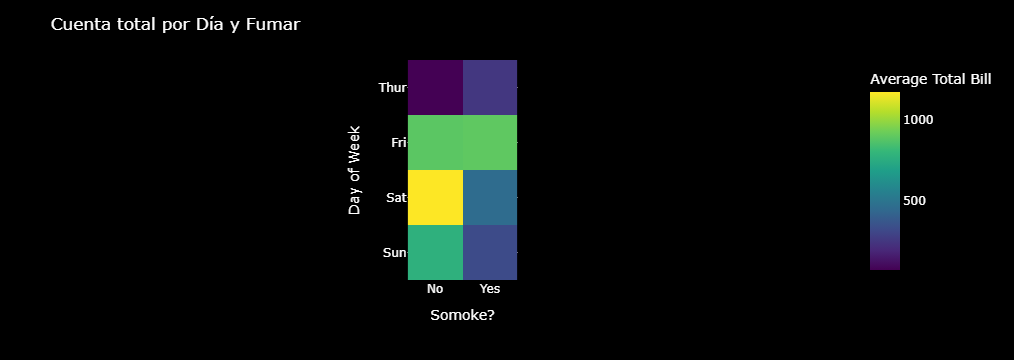

In [44]:
# Group by day and time, calculate average total_bill
heatmap_data = df.groupby(['day', 'smoker'])['total_bill'].sum().reset_index()

# Pivot the data to prepare for heatmap
heatmap_data_pivot = heatmap_data.pivot(index='day', columns='smoker', values='total_bill')

# Create a heatmap using Plotly
fig = px.imshow(
    heatmap_data_pivot,
    labels=dict(x="Somoke?", y="Day of Week", color="Average Total Bill"),
    x=['No', 'Yes'],
    y=['Thur', 'Fri', 'Sat', 'Sun'],  # Order of days as you prefer
    color_continuous_scale='Viridis'  # Choose a colorscale
)

# Customize layout
fig.update_layout(
    title='Cuenta total por Día y Fumar',
    plot_bgcolor='black',  # Set background color
    paper_bgcolor='black',  # Set background color
    font_color='white'  # Set font color
)

# Show plot
fig.show()


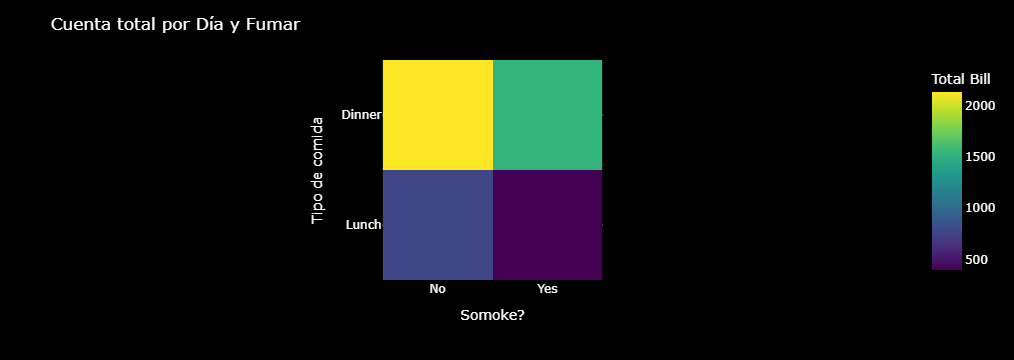

In [49]:
# Group by day and time, calculate average total_bill
heatmap_data = df.groupby(['time', 'smoker'])['total_bill'].sum().reset_index()

# Pivot the data to prepare for heatmap
heatmap_data_pivot = heatmap_data.pivot(index='time', columns='smoker', values='total_bill')

# Create a heatmap using Plotly
fig = px.imshow(
    heatmap_data_pivot,
    labels=dict(x="Somoke?", y="Tipo de comida", color="Total Bill"),
    x=['No', 'Yes'],
    y=['Dinner', 'Lunch'],  # Order of days as you prefer
    color_continuous_scale='Viridis'  # Choose a colorscale
)

# Customize layout
fig.update_layout(
    title='Cuenta total por Día y Fumar',
    plot_bgcolor='black',  # Set background color
    paper_bgcolor='black',  # Set background color
    font_color='white'  # Set font color
)

# Show plot
fig.show()

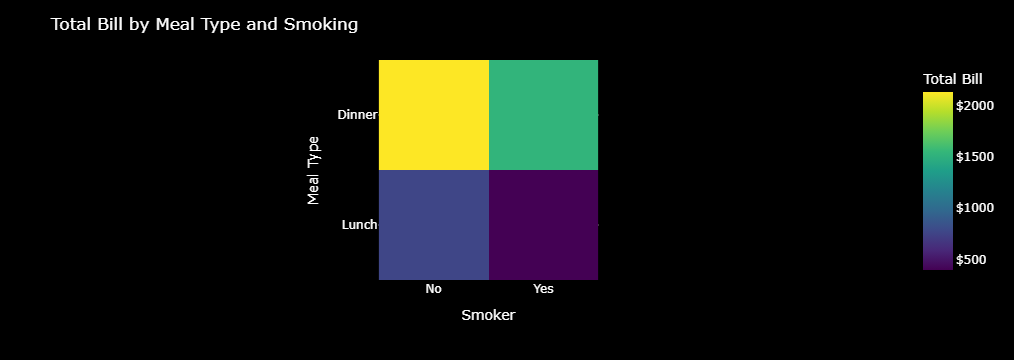

In [51]:

# Group by time and smoker, calculate total_bill sum
heatmap_data = df.groupby(['time', 'smoker'])['total_bill'].sum().reset_index()

# Pivot the data to prepare for heatmap
heatmap_data_pivot = heatmap_data.pivot(index='time', columns='smoker', values='total_bill')

# Create a heatmap using Plotly
fig = px.imshow(
    heatmap_data_pivot,
    labels=dict(x="Smoker", y="Meal Type", color="Total Bill"),
    x=heatmap_data_pivot.columns.tolist(),  # ['No', 'Yes']
    y=heatmap_data_pivot.index.tolist(),    # ['Dinner']
    color_continuous_scale='Viridis'  # Choose a colorscale
)

# Customize layout
fig.update_layout(
    title='Total Bill by Meal Type and Smoking',
    plot_bgcolor='black',  # Set background color
    paper_bgcolor='black',  # Set background color
    font_color='white',  # Set font color
    coloraxis_colorbar=dict(
        title='Total Bill',  # Colorbar title
        tickprefix='$',  # Prefix for tick labels
    )
)

# Show plot
fig.show()


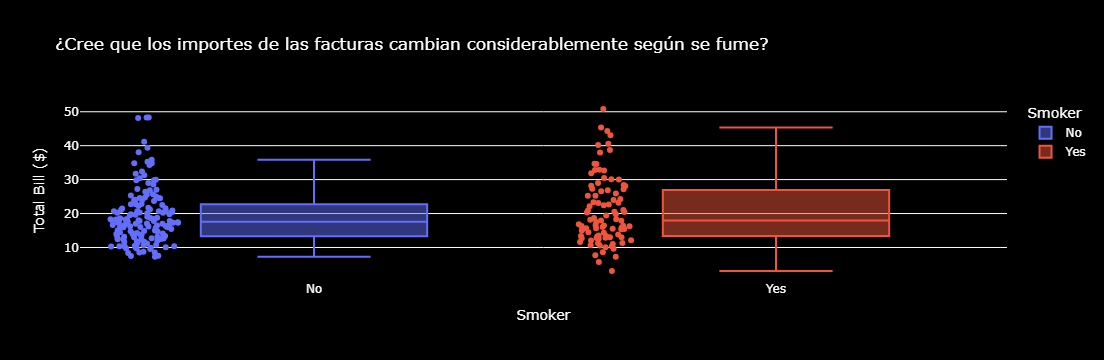

In [84]:

# Create a box plot using Plotly
fig = px.box(df, x='smoker', y='total_bill', points='all', color='smoker',
             title='¿Cree que los importes de las facturas cambian considerablemente según se fume?',
             labels={'smoker': 'Smoker', 'total_bill': 'Total Bill ($)'})

# Customize layout
fig.update_layout(
    plot_bgcolor='black',  # Set plot background color
    paper_bgcolor='black',  # Set paper background color
    font_color='white',  # Set font color
)

# Show plot
fig.show()


# ¿Está la propina correlacionada con la factura_total? 

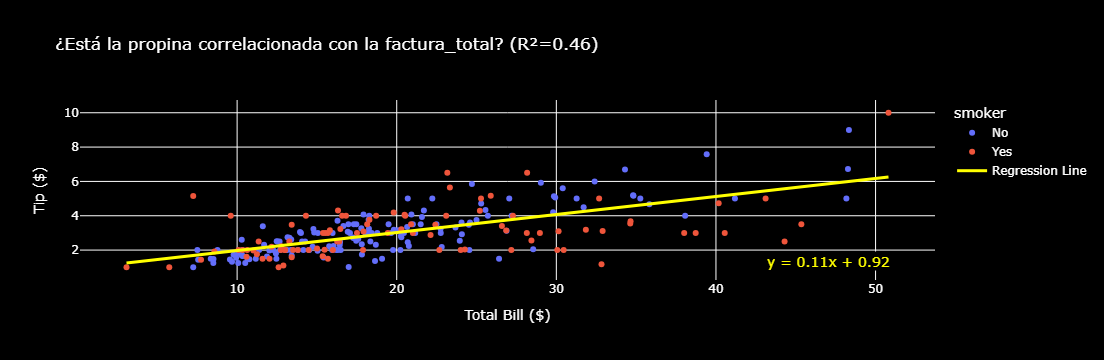

In [65]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['total_bill'], df['tip'])

# Calculate predicted values using the regression equation
df['tip_predicted'] = intercept + slope * df['total_bill']

# Calculate R-squared
r_squared = r_value**2

# Create scatter plot using Plotly Express
fig = px.scatter(df, x='total_bill', y='tip', color='smoker',
                 title=f'¿Está la propina correlacionada con la factura_total? (R²={r_squared:.2f})',
                 labels={'total_bill': 'Total Bill ($)', 'tip': 'Tip ($)'})

# Add regression line as a trace
fig.add_trace(go.Scatter(x=df['total_bill'], y=df['tip_predicted'], mode='lines', 
                         name='Regression Line', line=dict(color='yellow', width=3)))

# Add equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'
fig.add_annotation(
    x=0.95, y=0.05,
    xref='paper', yref='paper',
    text=equation,
    showarrow=False,
    font=dict(size=14, color='yellow'),
    bgcolor='black',
)

# Customize layout
fig.update_layout(
    plot_bgcolor='black',  # Set plot background color
    paper_bgcolor='black',  # Set paper background color
    font_color='white',  # Set font color
)

# Show plot
fig.show()

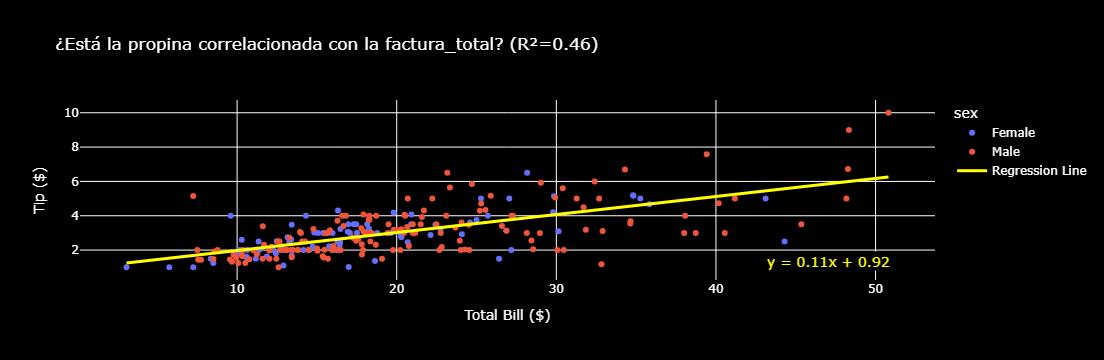

In [85]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['total_bill'], df['tip'])

# Calculate predicted values using the regression equation
df['tip_predicted'] = intercept + slope * df['total_bill']

# Calculate R-squared
r_squared = r_value**2

# Create scatter plot using Plotly Express
fig = px.scatter(df, x='total_bill', y='tip', color='sex',
                 title=f'¿Está la propina correlacionada con la factura_total? (R²={r_squared:.2f})',
                 labels={'total_bill': 'Total Bill ($)', 'tip': 'Tip ($)'})

# Add regression line as a trace
fig.add_trace(go.Scatter(x=df['total_bill'], y=df['tip_predicted'], mode='lines', 
                         name='Regression Line', line=dict(color='yellow', width=3)))

# Add equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'
fig.add_annotation(
    x=0.95, y=0.05,
    xref='paper', yref='paper',
    text=equation,
    showarrow=False,
    font=dict(size=14, color='yellow'),
    bgcolor='black',
)

# Customize layout
fig.update_layout(
    plot_bgcolor='black',  # Set plot background color
    paper_bgcolor='black',  # Set paper background color
    font_color='white',  # Set font color
)

# Show plot
fig.show()

In [45]:
# Outside, create a data set with PRODUCT_NUMBER and other with PRODUCT_DESC
output_file = 'Analysis_mobflag_bomb_deere.xlsx'
Bombardier_deere.to_excel(output_file, index=False)

print(f"DataFrame saved to {output_file}")


NameError: name 'Bombardier_deere' is not defined